##### Import required modules

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

##### Import page view data (.csv)

In [76]:
#df = pd.read_csv('fcc-forum-pageviews.csv')
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date')

df = pd.read_csv('fcc-forum-pageviews.csv').set_index('date')
df.index = pd.to_datetime(df.index)

print(df.head(8))
print(df.shape)
df.dtypes

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933
2016-05-14   3127
2016-05-15   2927
2016-05-16   2591
(1304, 1)


value    int64
dtype: object

##### Clean the data by omitting the (exclusive) 2.5% percentiles

In [77]:
df = df[(df['value'].quantile(0.025) < df['value']) & (df['value'] < df['value'].quantile(0.975) ) ]
print(df.shape)

(1238, 1)


##### Construct a line plot to show page views over time

Text(0, 0.5, 'Page Views')

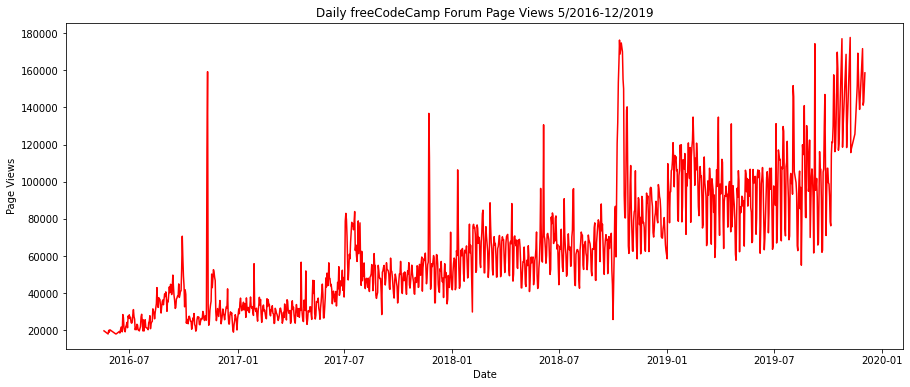

In [78]:
fig = mpl.figure(figsize = (15, 6) )
mpl.plot(df.index, df['value'], color = 'red')
mpl.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
mpl.xlabel('Date')
mpl.ylabel('Page Views')

##### Construct a bar chart to show mean views per month, grouped by year.
###### Reformat the DataFrame

In [193]:
df_bar = df.copy()

# ----- method one -----

#time_arrays = [ [year for year in df_bar.index.year], [month for month in df_bar.index.month] ]
#index = pd.MultiIndex.from_arrays(time_arrays, names = ('Years', 'Month') )
#df_Bar = pd.DataFrame({'Views' : [value for value in df_bar['value'] ] }, index = index)
#df_Bar = df_Bar.groupby(['Years', 'Month'])['Views'].mean().unstack(level = -1)


# ----- method two -----
# unstack() method converts index values to DF columns; level = -1 specifies the innermost index, the last element of the
# list passed to the groupby() method. The unstacked index becomes the legend variable, while the remaining index ('Years') 
# becomes the x-axis variable. 

df_bar['Years'], df_bar['Month'] = df_bar.index.year, df_bar.index.month
df_bar = df_bar.groupby(['Years', 'Month'])['value'].mean().unstack(level = -1)

df_bar

Month,1,2,3,4,5,6,7,8,9,10,11,12
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


###### Plotting the data

<class 'matplotlib.figure.Figure'>


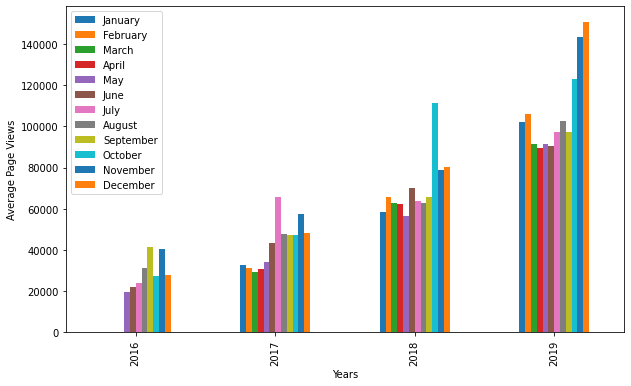

In [267]:
bar = df_bar.plot.bar(figsize = (10, 6), ylabel = "Average Page Views").figure
mpl.legend(["January", "February", "March", "April", "May", "June",
            "July", "August", "September", "October", "November", "December"])
print(type(bar))

##### Construct box plots to separately show page views per year and per month

In [209]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date] # format months as length=3 strings

df_box.head(7)

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
5,2016-06-07,18335,2016,Jun
6,2016-06-08,18072,2016,Jun


<class 'matplotlib.figure.Figure'>


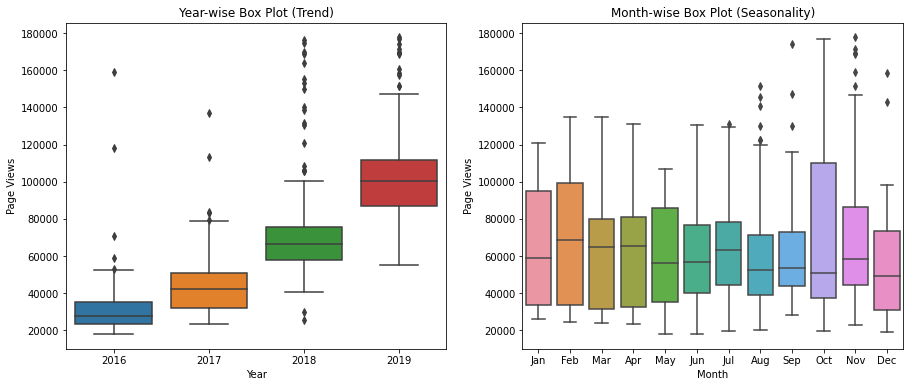

In [264]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(15, 6))

sb.boxplot(x = df_box['year'], y = df_box['value'], ax = ax1 )
sb.boxplot(x = df_box['month'], y = df_box['value'], ax = ax2, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                                        'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'] )

ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set(xlabel = 'Year', ylabel = 'Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set(xlabel = 'Month', ylabel = 'Page Views')

print(type(fig))